In [43]:
#!pip install pandasticsearch[pandas]

from elasticsearch import Elasticsearch
from pandasticsearch import DataFrame
from pandasticsearch import Select
from matplotlib import pyplot as plt
import seaborn as sns
ES_HOST = 'http://ec2-34-205-15-150.compute-1.amazonaws.com:9200'
INDEX = "eda1"
DOC_TYPE="user"
es = Elasticsearch(ES_HOST)

In [39]:
result_dict = es.search(index=INDEX, body={"from" : 0, "size" : 3000,"query": {"match_all": {}}})
df = Select.from_dict(result_dict).to_pandas()
df = df.set_index(['email'])
df.drop(['_index', '_score', '_type', '_id'],inplace=True,axis=1,errors='ignore')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
_id                       3000 non-null object
address                   3000 non-null object
avg_revenue_per_month     3000 non-null float64
country                   3000 non-null object
discount_percentage       3000 non-null int64
email                     3000 non-null object
email_unsubscribe         3000 non-null bool
f_score                   3000 non-null int64
fav_color                 3000 non-null object
job                       3000 non-null object
lifecycle                 3000 non-null int64
m_score                   3000 non-null int64
name                      3000 non-null object
num_of_orders             3000 non-null int64
r_score                   3000 non-null int64
revenue                   3000 non-null int64
rfm_score                 3000 non-null int64
signup_date               3000 non-null object
total_discount_revenue    3000 non-null float64
dtypes: 

In [29]:
df.columns

Index(['_id', 'address', 'avg_revenue_per_month', 'country',
       'discount_percentage', 'email', 'email_unsubscribe', 'f_score',
       'fav_color', 'job', 'lifecycle', 'm_score', 'name', 'num_of_orders',
       'r_score', 'revenue', 'rfm_score', 'signup_date',
       'total_discount_revenue'],
      dtype='object')

In [40]:
df.head()

,address,avg_revenue_per_month,country,discount_percentage,email_unsubscribe,f_score,fav_color,job,lifecycle,m_score,name,num_of_orders,r_score,revenue,rfm_score,signup_date,total_discount_revenue
email,,,,,,,,,,,,,,,,,
brianwhite@example.org,"9035 May Lakes Apt. 180\nWest Margaret, OK 77492",2939.000000,Turks and Caicos Islands,28,False,5,DodgerBlue,Advertising art director,8,6,Bryan Rodriguez,0,9,557,20,2017-03-13T15:34:19,155.96
podonnell@example.org,"22532 Ian Locks\nPort Danachester, HI 18982-5173",760.272727,Cuba,17,True,0,YellowGreen,Regulatory affairs officer,2,8,Joshua Alvarez,3,5,2776,13,2017-05-06T02:21:35,471.92
jmata@example.net,"0082 Kevin Village Suite 285\nLucasport, NY 34...",471.857143,Cambodia,26,True,5,DarkMagenta,Land,3,5,Matthew Deleon,2,0,1407,10,2017-05-16T14:03:47,365.82
kimberlytaylor@example.org,"18693 Christopher Street\nJosephtown, OR 03025...",250.000000,Liberia,18,True,5,Salmon,Youth worker,9,9,Megan Larson,0,3,116,17,2017-05-01T20:54:28,20.88
elizabethsalazar@example.net,"3076 Zavala Trail\nSummerton, MN 23783-0783",849.300000,Namibia,18,False,4,ForestGreen,Youth worker,4,5,Nancy Raymond,0,5,181,14,2017-04-23T12:43:28,32.58


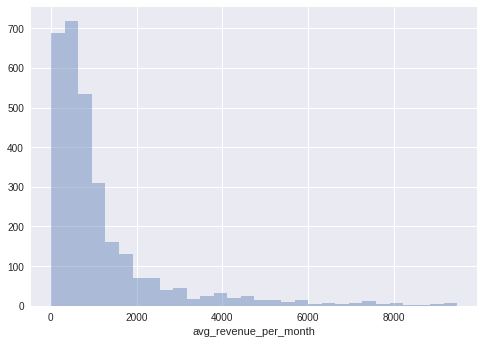

In [53]:
sns.distplot(df['avg_revenue_per_month'],bins=30, kde=False, norm_hist=False)
plt.show()